# Data Visualization

In [3]:
import numpy as np
import pandas as pd

# import contoh data imigrasi ke Canada
df_can = pd.read_excel('data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [9]:
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [6]:
# kita mau drop kolom yang tidak kita pakai

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [12]:
df_can.shape

(195, 38)

In [7]:
# merubah nama kolom seperti OdName menjadi Country

df_can.rename(columns={
    "OdName": "Country",
    "RegName": "Region",
    "AreaName": "Continent"
}, inplace=True)

In [16]:
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [8]:
# kita set index nya menggunakan nama negaranya saja
df_can.set_index('Country', inplace=True)

In [18]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [9]:
# kita bisa tambahkan kolom Total
df_can['Total'] = df_can.sum(axis=1)

In [20]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [21]:
# data cleaning, cek apakah ada missing data
df_can.isnull().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [22]:
# masih data cleaning, cek apakah ada data yang tidak masuk akal
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [23]:
# memanggil satu row data dengan index nya - pakai loc
df_can.loc['Indonesia']

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [24]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [25]:
# memanggil satu row data secara dia baris ke berapa
df_can.iloc[80]

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [34]:
# ini mengambil 1 row data dengan query
# query nya adalah data di kolom 1985 isinya 100 (atau ada 100 orang pindah ke Canada di tahun 1985)
# di transpose mengubah data betuk 1 row multiple columns menjadi 1 column dan multiple rows
# squeeze mengubah tipe data Pandas DataFrame yang cuman punya 1 kolom menjadi tipe data Pandas Series
df_can[df_can[1985] == 100].T.squeeze()

Continent                  Asia
Region       South-Eastern Asia
DevName      Developing regions
1980                        186
1981                        178
1982                        252
1983                        115
1984                        123
1985                        100
1986                        127
1987                        213
1988                        270
1989                        260
1990                        227
1991                        252
1992                        243
1993                        278
1994                        262
1995                        205
1996                        231
1997                        166
1998                        165
1999                        525
2000                       1138
2001                        907
2002                        709
2003                        515
2004                        552
2005                        632
2006                        613
2007                        657
2008    

In [35]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [37]:
# .loc juga bisa mencari data dari nama index DAN nama kolom nya
df_can.loc['Indonesia', 2000]

1138

In [40]:
# .loc juga bisa cari data dari multiple rows dan columns
df_can.loc[['Indonesia', 'Singapore'], [1990, 2000,2010]]

,1990,2000,2010
Country,,,
Indonesia,227,1138,712
Singapore,843,444,805


In [41]:
years = range(1980,2014)
years

range(1980, 2014)

### Filter menurut kriteria tertentu

In [48]:
khusus_asia = df_can['Continent'] == 'Asia'

In [49]:
df_can_asia = df_can[khusus_asia]
df_can_asia.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568


In [50]:
khusus_asean = df_can['Region'] == 'South-Eastern Asia'

In [53]:
df_can_asean = df_can[khusus_asean]
df_can_asean.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,632,613,657,661,504,712,390,395,387,13150
Lao People's Democratic Republic,Asia,South-Eastern Asia,Developing regions,11,6,16,16,7,17,21,...,42,74,53,32,39,54,22,25,15,1089
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,593,580,600,658,640,802,409,358,204,24417
Myanmar,Asia,South-Eastern Asia,Developing regions,80,62,46,31,41,23,18,...,210,953,1887,975,1153,556,368,193,262,9245
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,392,298,690,734,366,805,219,146,141,14579
Thailand,Asia,South-Eastern Asia,Developing regions,56,53,113,65,82,66,78,...,575,500,487,519,512,499,396,296,400,9174


In [52]:
df_can_asean.shape

(10, 38)

In [54]:
kondisi_1980_50 = df_can[1980] > 50
kondisi_1990_50 = df_can[1990] > 50

In [67]:
df_hasil_query = df_can[khusus_asean & (kondisi_1990_50 | kondisi_1980_50)]
df_hasil_query

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Indonesia,Asia,South-Eastern Asia,Developing regions,186,178,252,115,123,100,127,...,632,613,657,661,504,712,390,395,387,13150
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,593,580,600,658,640,802,409,358,204,24417
Myanmar,Asia,South-Eastern Asia,Developing regions,80,62,46,31,41,23,18,...,210,953,1887,975,1153,556,368,193,262,9245
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Singapore,Asia,South-Eastern Asia,Developing regions,241,301,337,169,128,139,205,...,392,298,690,734,366,805,219,146,141,14579
Thailand,Asia,South-Eastern Asia,Developing regions,56,53,113,65,82,66,78,...,575,500,487,519,512,499,396,296,400,9174
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146


# Visualizing data with Matplotlib
- import matplotlib nya dan
- import juga matplotlib.pyplot

In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Country'>

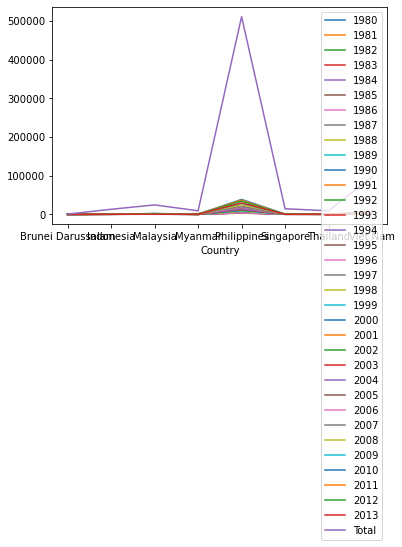

In [60]:
df_hasil_query.plot() # default plot style

In [18]:
# ubah style dengan minta ke matplotlib
print(mpl.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Country'>

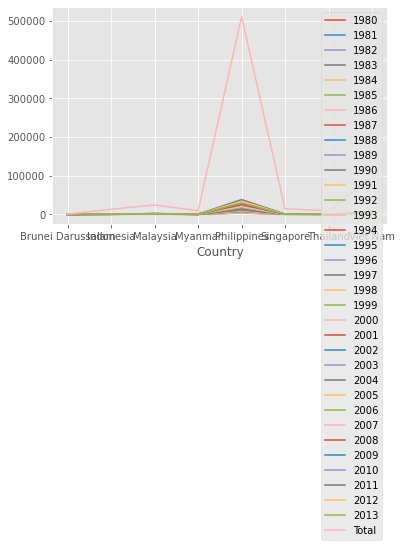

In [63]:
df_hasil_query.plot()

<AxesSubplot:>

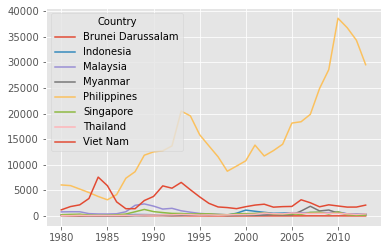

In [70]:
# kita ambil data yang khusus kolom tahun saja, exclude kolom total
df_hasil_query.loc[:, years].T.plot()

## Case 1: Haiti Immigration to Canada

In [71]:
df_haiti = df_can.loc['Haiti', years]
df_haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

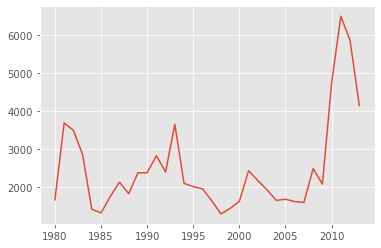

In [72]:
df_haiti.plot()

In [81]:
df_haiti.index.map(int) # teknik mengubah index menjadi tipe integer
# boleh dicoba int diganti float, str untuk melihat efek map ke list df_haiti.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

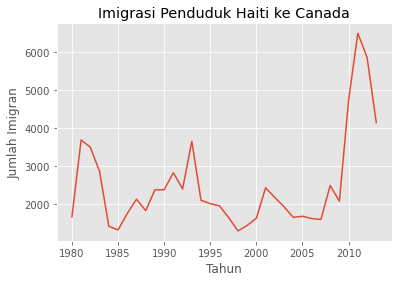

In [82]:
# sekarang kita berikan judul, label y axis, dan label x axis ke hasil plot nya
df_haiti.plot()

# pakai si matplotlib.pyplot untuk menambahkan label
plt.title("Imigrasi Penduduk Haiti ke Canada")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

Text(0.8, 0.6, 'gempa 2010')

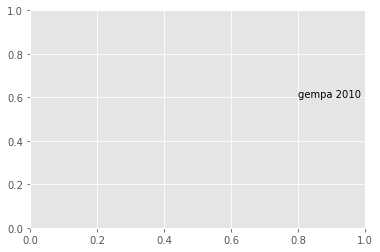

In [85]:
# ada lonjakan jumlah imigran di tahun 2010-2011
# sebenarnya ada insiden gempa bumi di Haiti di tahun 2010 yang mungkin membuat trend ini
# kita bisa tambahkan info tersebut ke plot nya dengan menggunakan matplotlib.pyplot.text

# cara tulis .text isinya ada 3 parameter: x, y, dan text nya sendiri
plt.text(0.8,0.6,"gempa 2010")

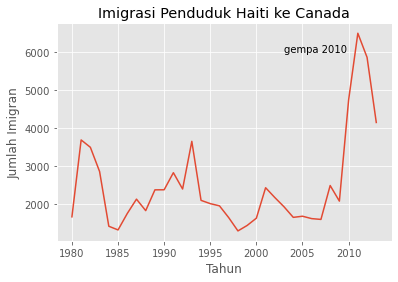

In [89]:
df_haiti.plot()
plt.title("Imigrasi Penduduk Haiti ke Canada")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.text(2003, 6000, "gempa 2010")

plt.show()

## Case 2: Imigrasi Penduduk China dan India ke Canada 1980-2013

In [98]:
china_india = df_can.loc[['China','India'], years]
china_india.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


<AxesSubplot:xlabel='Country'>

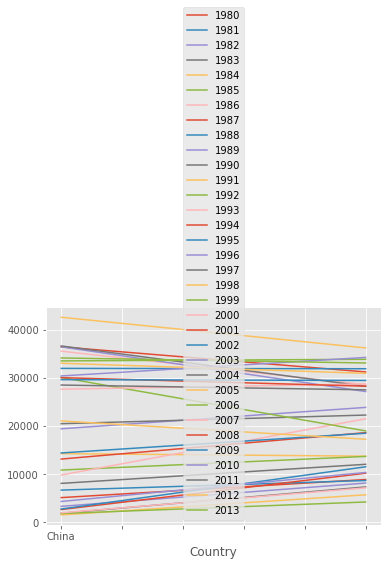

In [99]:
china_india.plot() # kolom nya banyak, jadi hasil plot nya tidak terlihat

<AxesSubplot:>

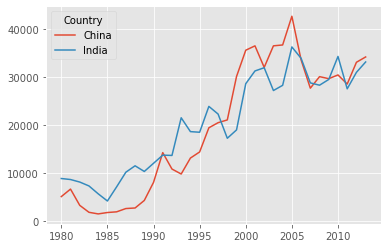

In [100]:
china_india = china_india.T
china_india.plot()

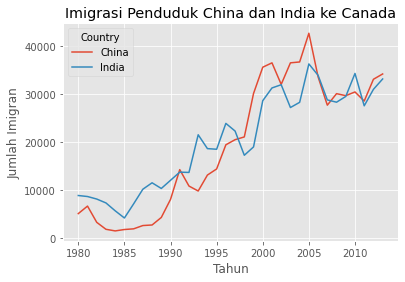

In [101]:
china_india.plot()

plt.title("Imigrasi Penduduk China dan India ke Canada")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

## Case 3: Top 5 negara dengan imigrasi terbanyak ke Canada selama 1980-2013

<AxesSubplot:>

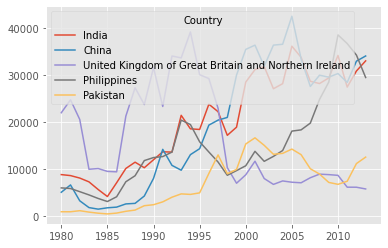

In [117]:
# buat dataframe baru yang di sortir rows nya menurut data kolom Total, dari besar ke kecil (descending)
df_can_sorted = df_can.sort_values(by='Total', ascending=False, axis=0) 

# ambil 5 baris pertama saja, untuk jadi top 5
df_top5 = df_can_sorted.head(5)

# ambil kolom yang years saja yaitu 1980-2013
df_top5_years = df_top5[years]

# kita transpose sehingga indexnya adalah years 1980-2013
df_top5_years = df_top5_years.T

# di plot, index menjadi x-axis
df_top5_years.plot()

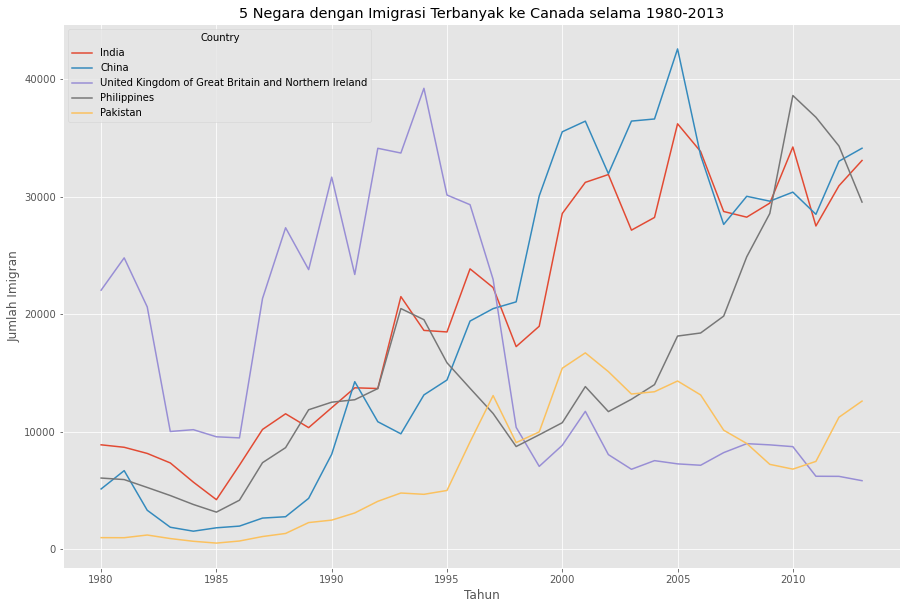

In [119]:
# karena plot nya kecil sekali, kita tambahkan opsi figsize "figure size" atau "ukuran gambar"
df_top5_years.plot(figsize=(15,10))

# belum selesai, kita perlu berikan judul dan label axis nya
# pakai si matplotlib.pyplot untuk menambahkan label
plt.title("5 Negara dengan Imigrasi Terbanyak ke Canada selama 1980-2013")
plt.ylabel("Jumlah Imigran")
plt.xlabel("Tahun")

plt.show()

<AxesSubplot:>

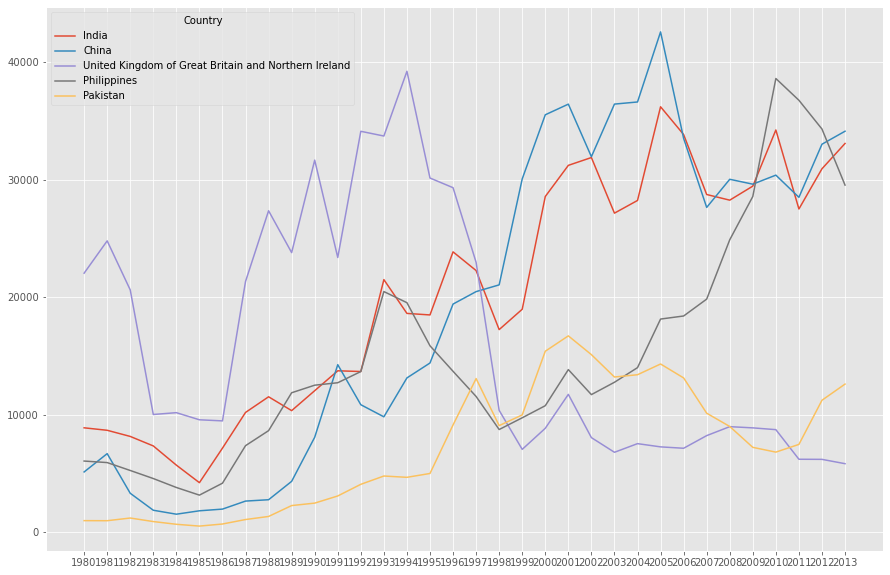

In [120]:
df_top5_years.plot(figsize=(15,10), xticks=years)

## Tipe plot
Sejauh ini tipe plot nya adalah default kind, yaitu "line"

Tetapi ada banyak tipe plot lainnya, contohnya tipe "area"

### Area Plot

<AxesSubplot:>

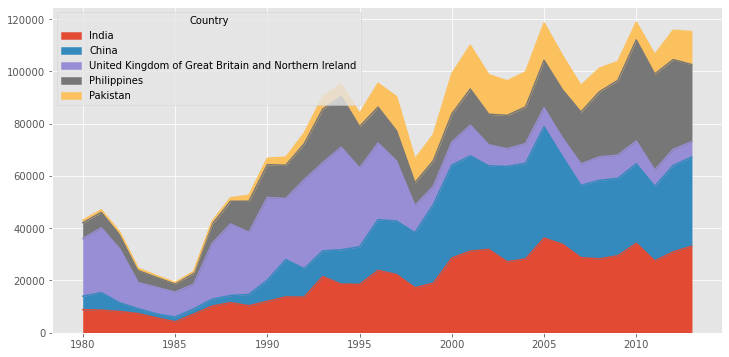

In [128]:
# membuat area plot, cukup tambahkan opsi kind="area"
df_top5_years.plot(kind="area", figsize=(12,6))

<AxesSubplot:>

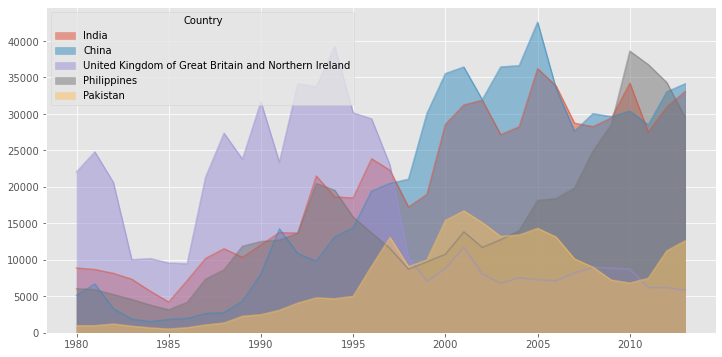

In [129]:
# kalau tidak mau datanya ditumpuk, kita tambahkan opsi stacked=False
df_top5_years.plot(kind="area", stacked=False,figsize=(12,6))

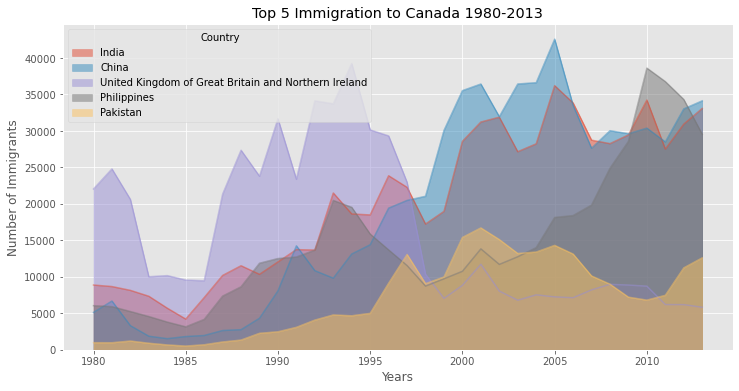

In [130]:
# jangan lupa tambahkan label ke hasil plot nya

df_top5_years.plot(kind="area", stacked=False,figsize=(12,6))
plt.title("Top 5 Immigration to Canada 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")
plt.show()

<AxesSubplot:>

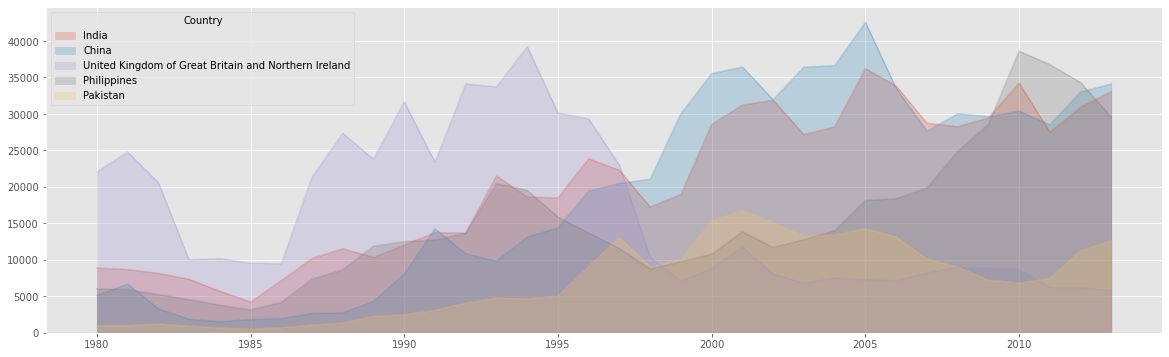

In [134]:
# perhatikan kalau warna area nya agak-agak transparan. 
# seberapa transparan warnanya bisa kita atur dengan opsi alpha=0.25 (0% tidak kelihatan, 100% tidak transparan)
df_top5_years.plot(kind="area", stacked=False,figsize=(20,6), alpha=0.25)

### Teknik Scripting layer VS Artist layer

#### Scripting layer
teknik menggunakan plt untuk menambahkan text ke plot yang terakhir kita buat

#### Artist layer
teknik memasukkan plot kita ke dalam sebuah variable yang kemudian kita panggil
untuk set_title, atau set jenis text lainnya

Text(0, 0.5, 'Number of Immigrants')

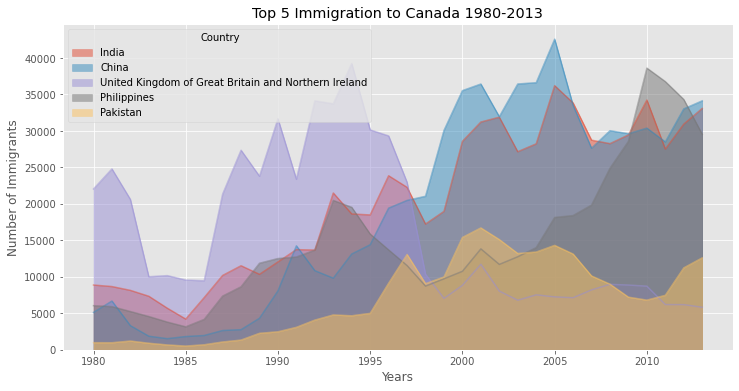

In [135]:
ax = df_top5_years.plot(kind="area", stacked=False,figsize=(12,6))
ax.set_title("Top 5 Immigration to Canada 1980-2013")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

## Case 4: membuat area plot, untuk 5 negara yang imigrasi paling sedikit ke Canada selama 1980-2013
*pakai scripting layer, tipe area nya stacked, dan transparansinya 45% (0.45)

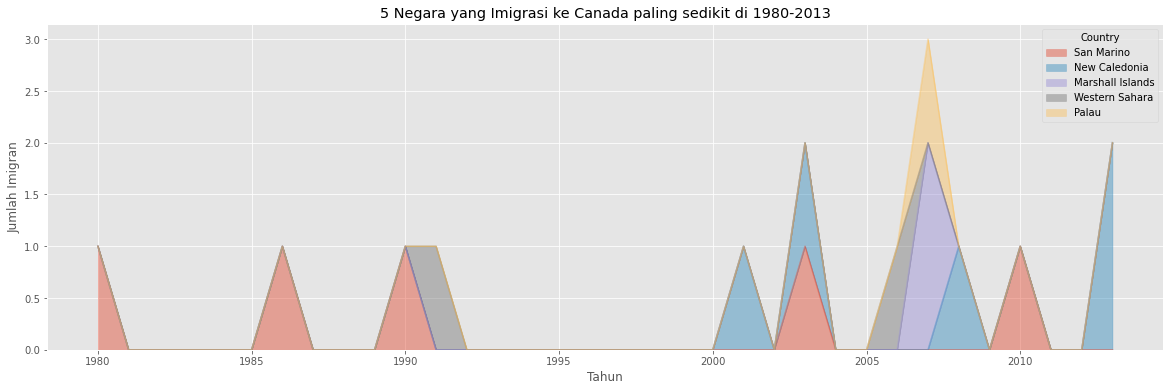

In [146]:
# cari dulu 5 negara yang imigrasi ke Canada paling sedikit
df_least5 = df_can_sorted.tail(5)
df_least5 = df_least5[years]
df_least5 = df_least5.T

# plot tipe area
df_least5.plot(kind="area", stacked=True, alpha=0.45, figsize=(20,6))

# scripting layer untuk kasih label
plt.title("5 Negara yang Imigrasi ke Canada paling sedikit di 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()

## Case 5:
- artist layer
- unstacked
- area plot
- 5 negara yang imigrasi ke Canada paling sedikit selama 1980-2013
- transparansi 0.55

Text(0, 0.5, 'jumlah imigran')

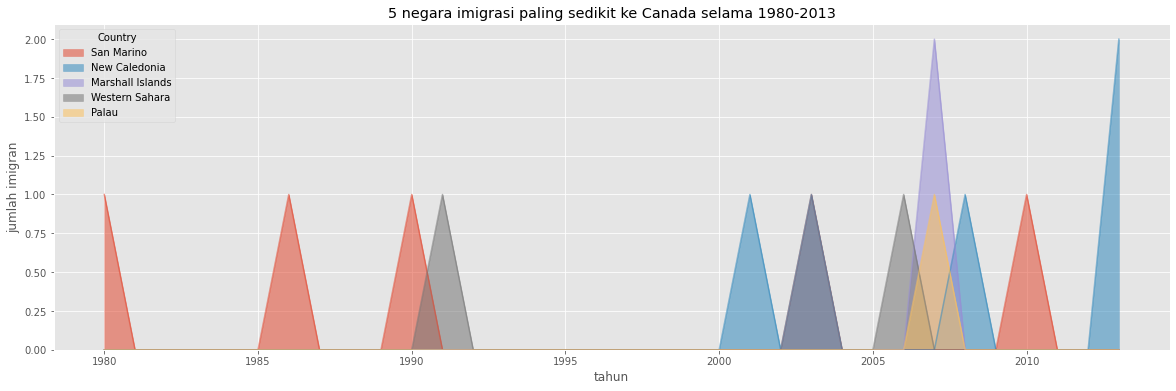

In [148]:
# gunakan data least5 yang tadi sudah dibuat
# mau pakai artist layer, jadi plot nya kita masukkan ke variable
hasil_plot = df_least5.plot(kind="area", stacked=False, alpha=0.55, figsize=(20,6))

# udah gitu, plotnya kita berikan set_title dan lainnya
hasil_plot.set_title("5 negara imigrasi paling sedikit ke Canada selama 1980-2013")
hasil_plot.set_xlabel("tahun")
hasil_plot.set_ylabel("jumlah imigran")

Text(0, 0.5, 'jumlah imigran')

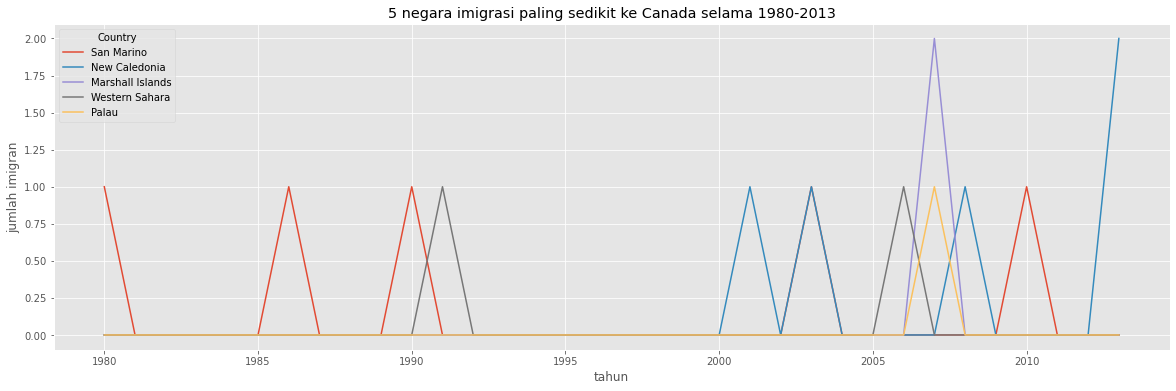

In [149]:
# iseng mau melihat jika tipe plot nya line seperti apa, ubah saja kind menjadi "line"
# hapus juga opsi stacked dan alpha yang merupakan milik plot "area"
hasil_plot = df_least5.plot(kind="line", figsize=(20,6))

# udah gitu, plotnya kita berikan set_title dan lainnya
hasil_plot.set_title("5 negara imigrasi paling sedikit ke Canada selama 1980-2013")
hasil_plot.set_xlabel("tahun")
hasil_plot.set_ylabel("jumlah imigran")

## Case 6: Histogram - frekuensi distribusi data
Bagaimana frekuensi distribusi jumlah imigrasi per negara ke Canada di tahun 2013

In [150]:
# data imigrasi ke Canada di tahun 2013
df_can[2013]

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
                  ... 
Viet Nam          2112
Western Sahara       0
Yemen              217
Zambia              59
Zimbabwe           407
Name: 2013, Length: 195, dtype: int64

In [151]:
# pakai bantuan numpy.histogram untuk mencari 2 set data yang kita perlukan
count, bin_edges = np.histogram(df_can[2013])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


<AxesSubplot:ylabel='Frequency'>

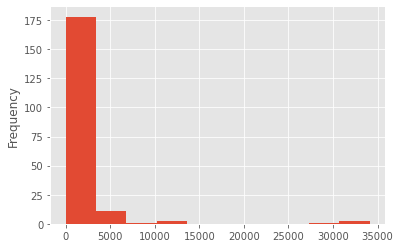

In [153]:
# sebenarnya untuk plot histogram kita bisa aja langsung plot dari data kita
# kasih kind="hist"
df_can[2013].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

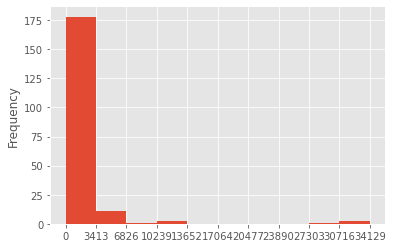

In [154]:
# tapi garis garisnya tidak pas, karena itu kita gunakan data dari numpy.histogram tadi
# untuk meng-edit plot nya

df_can[2013].plot(kind="hist", xticks=bin_edges)

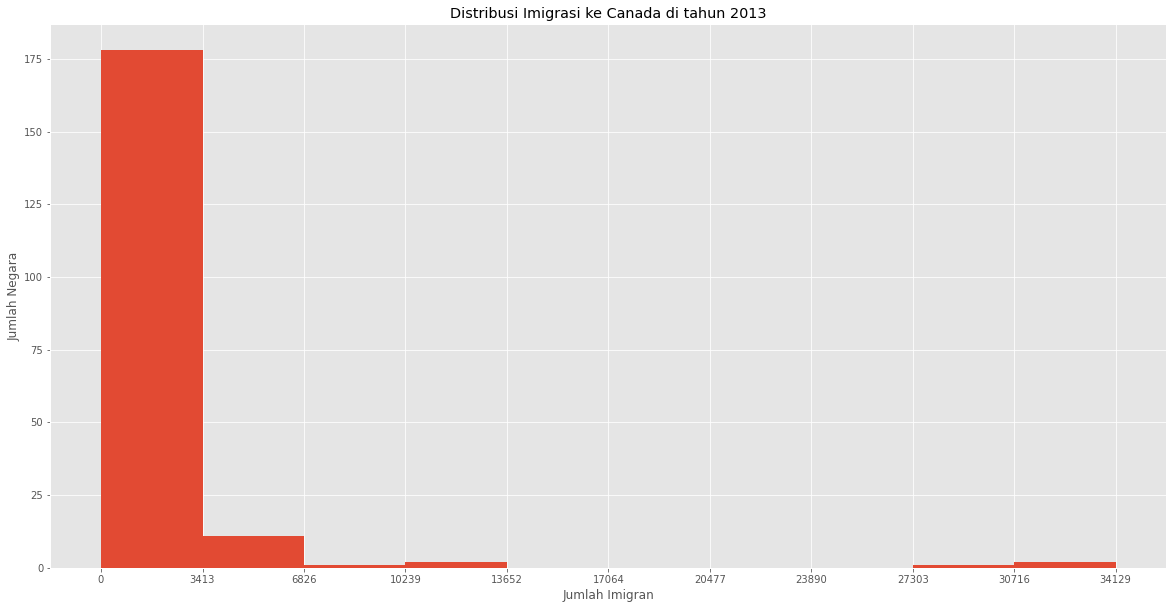

In [156]:
# jangan lupa tambahkan label nya
# kalau kekecilan, edit opsi figsize
df_can[2013].plot(kind="hist", xticks=bin_edges, figsize=(20,10))
plt.title("Distribusi Imigrasi ke Canada di tahun 2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Jumlah Negara")
plt.show()

## Case 7: Histogram - frekuensi distribusi data
Bagaimana frekuensi distribusi jumlah imigrasi Denmark, Norway, dan Sweden ke Canada selama 1980-2013

In [160]:
# ambil datanya dulu untuk 'Denmark', 'Norway', 'Sweden' dan kolom tahun 1980-2013
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_dns

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

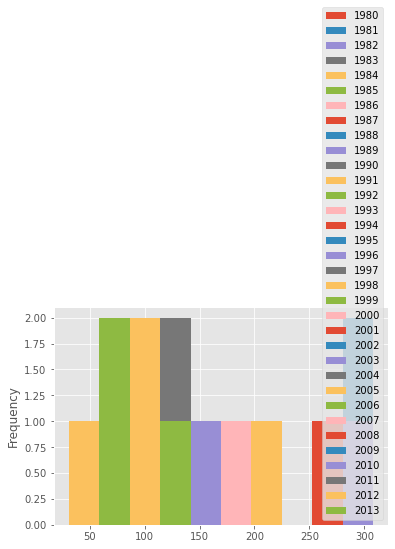

In [161]:
# kalau langsung kita plot
df_dns.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

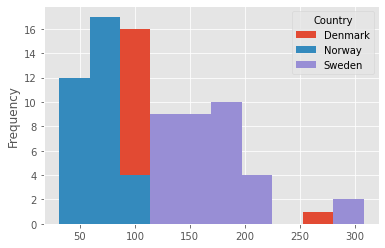

In [162]:
# bentuknya salah, kita perlu transpose
df_dns = df_dns.T
df_dns.plot(kind="hist")

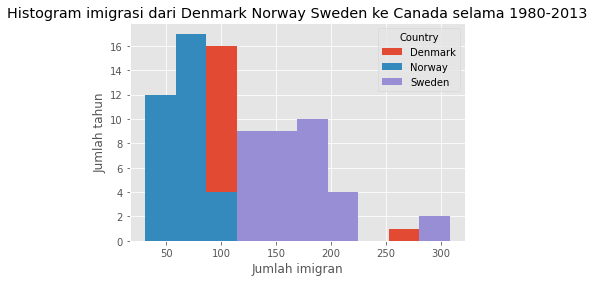

In [169]:
# apa arti histogram ini?

df_dns.plot(kind="hist")
plt.title("Histogram imigrasi dari Denmark Norway Sweden ke Canada selama 1980-2013")
plt.xlabel("Jumlah imigran")
plt.ylabel("Jumlah tahun")
plt.show()

In [167]:
# garis garis x-label nya tidak pas dengan histogram bins nya, jadi
# kita minta bantuan numpy.histogram lagi untuk dapat angka yang benarnya
# untuk dijadikan x-ticks, marker x-label yang baru

count, bin_edges = np.histogram(df_dns)

print(count, len(count))
print(bin_edges)

[12 27 20 13 10 11  4  0  1  4] 10
[ 31.   58.7  86.4 114.1 141.8 169.5 197.2 224.9 252.6 280.3 308. ]


In [168]:
# secara default np.histogram akan memberikan 10 bins
# kita bisa edit untuk minta jumlah bins berbeda

count, bin_edges = np.histogram(df_dns, 15)

print(count, len(count))
print(bin_edges)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3] 15
[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


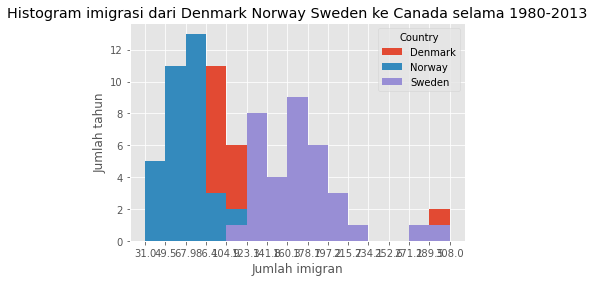

In [171]:
# berikan jumlah bins baru ke plot kita
# berikan juga xticks yang cocoknya yang sudah kita dapatkan dari numpy.histogram tadi
df_dns.plot(kind="hist", bins=15, xticks=bin_edges)

plt.title("Histogram imigrasi dari Denmark Norway Sweden ke Canada selama 1980-2013")
plt.xlabel("Jumlah imigran")
plt.ylabel("Jumlah tahun")
plt.show()

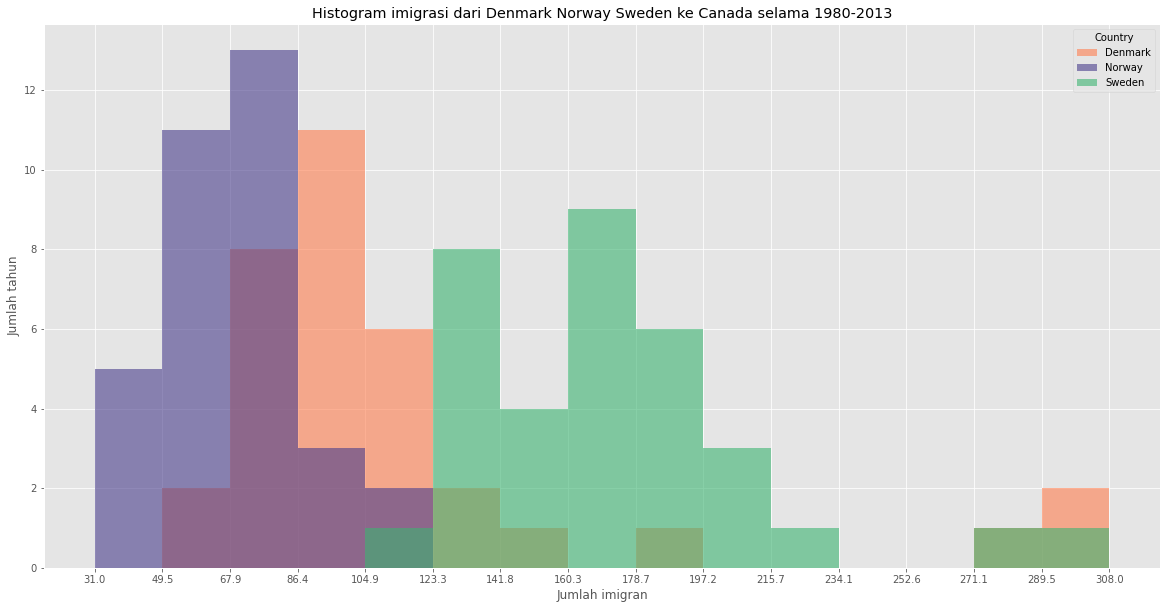

In [173]:
# berikutnya, kita edit ukuran plot nya
# juga warna bin nya
# dan transparansi warnanya
df_dns.plot(kind="hist", bins=15, xticks=bin_edges, figsize=(20,10), color=['coral', 'darkslateblue','mediumseagreen'], alpha=0.6)

plt.title("Histogram imigrasi dari Denmark Norway Sweden ke Canada selama 1980-2013")
plt.xlabel("Jumlah imigran")
plt.ylabel("Jumlah tahun")
plt.show()

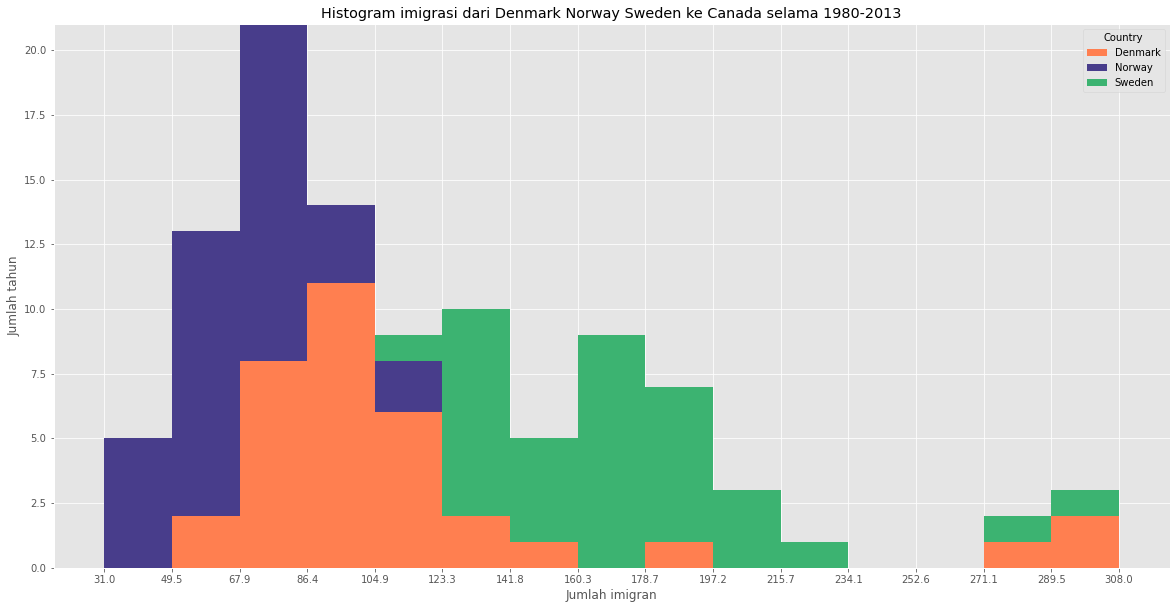

In [174]:
# kalau mau di stack juga bisa, tambahkan opsi stacked

df_dns.plot(
    kind="hist", 
    bins=15, 
    xticks=bin_edges, 
    figsize=(20,10), 
    color=['coral', 'darkslateblue','mediumseagreen'],
    stacked=True
)


plt.title("Histogram imigrasi dari Denmark Norway Sweden ke Canada selama 1980-2013")
plt.xlabel("Jumlah imigran")
plt.ylabel("Jumlah tahun")
plt.show()

# Bar Chart

Case study: Icelandic immigrants to Canada 1980-2013

In [13]:
years = range(1980, 2014)
df_iceland = df_can.loc['Iceland', years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

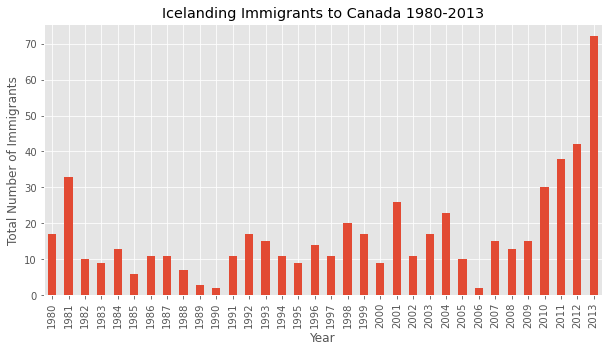

In [19]:
df_iceland.plot(kind="bar", figsize=(10,5))

plt.title("Icelanding Immigrants to Canada 1980-2013")
plt.xlabel("Year")
plt.ylabel("Total Number of Immigrants")
plt.show()

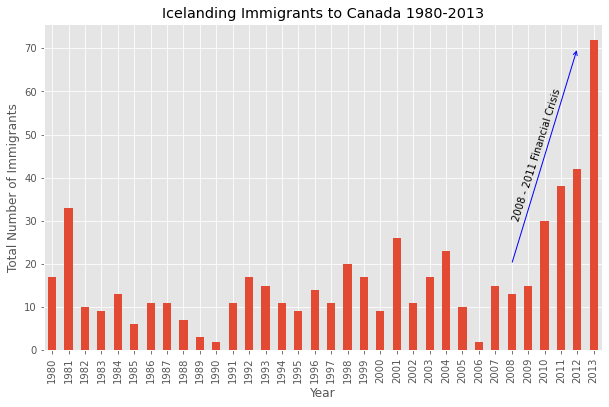

In [34]:
df_iceland.plot(kind="bar", figsize=(10,6))

plt.title("Icelanding Immigrants to Canada 1980-2013")
plt.xlabel("Year")
plt.ylabel("Total Number of Immigrants")

plt.annotate(
    text="2008 - 2011 Financial Crisis", 
    xy=(28,30),
    rotation=72.5
)

plt.annotate(
    text="",
    xy=(32,70), #kepala panah
    xytext=(28,20), #buntut panah
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='blue', lw=1)
)

plt.show()

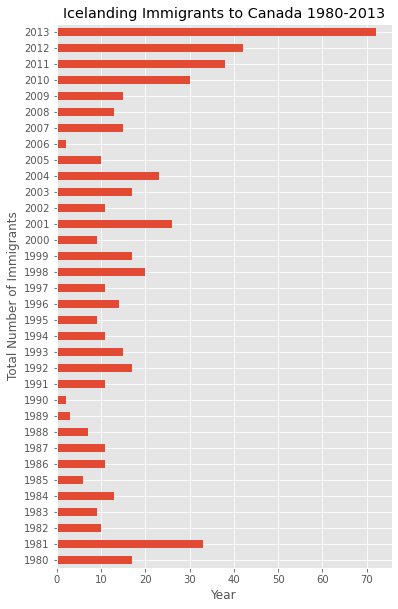

In [36]:
df_iceland.plot(kind="barh", figsize=(6,10))

plt.title("Icelanding Immigrants to Canada 1980-2013")
plt.xlabel("Year")
plt.ylabel("Total Number of Immigrants")
plt.show()

## Pie Chart
sebelum membuat pie chart, kita siapkan dulu data dengan persentasenya. Karena pie chart bukan untuk plot data
excel dengan x dan y axis, tapi lebih ke kumpulan kategori, masing2 kategori itu berapa persen dari keseluruhan.

Di contoh ini, kita akan mencari persentase imigran per benua (continent)

In [42]:
# Benua-benua ini persentase mengirim imigran ke Canada nya masing2 berapa persen

df_continent = df_can.groupby('Continent', axis=0).sum()
df_continent

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


<AxesSubplot:ylabel='Total'>

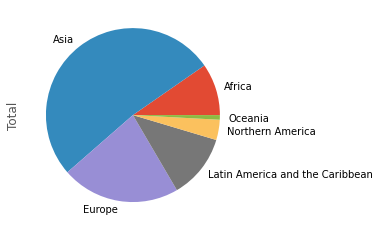

In [43]:
# kita ambil data dari kolom Total saja, lalu di plot
df_continent['Total'].plot(kind="pie")

<AxesSubplot:ylabel='Total'>

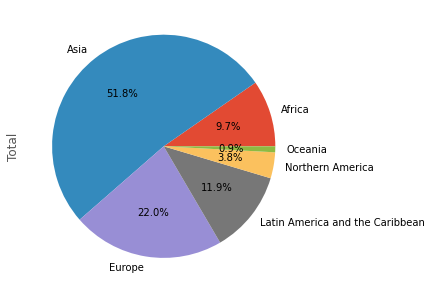

In [49]:
df_continent['Total'].plot(
    kind="pie",
    figsize=(5,6),
    autopct="%1.1f%%",
    startangle=0
)

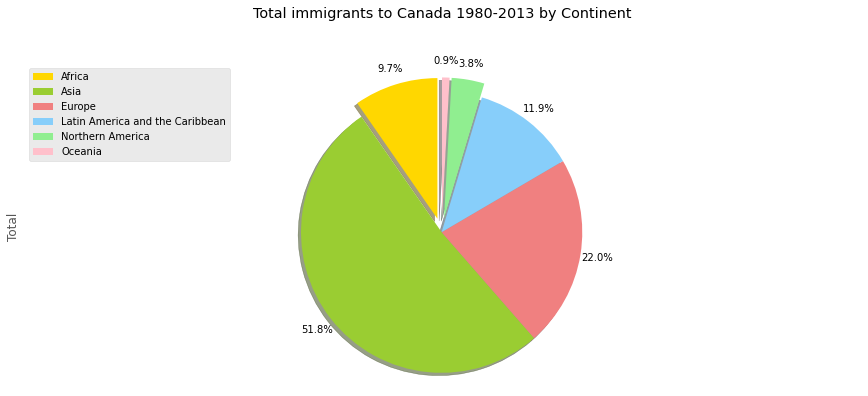

In [75]:
df_continent['Total'].plot(
    kind="pie",
    figsize=(15,6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'],
    explode=[0.1,0,0,0,0.1,0.1],
    pctdistance=1.12,
    labels=None
)


plt.title("Total immigrants to Canada 1980-2013 by Continent", y=1.12)

# memastikan size graph nya sesuai figsize
plt.axis('equal')

# tambahin legent menggunakan script
plt.legend(labels=df_continent.index, loc="upper left")

plt.show()

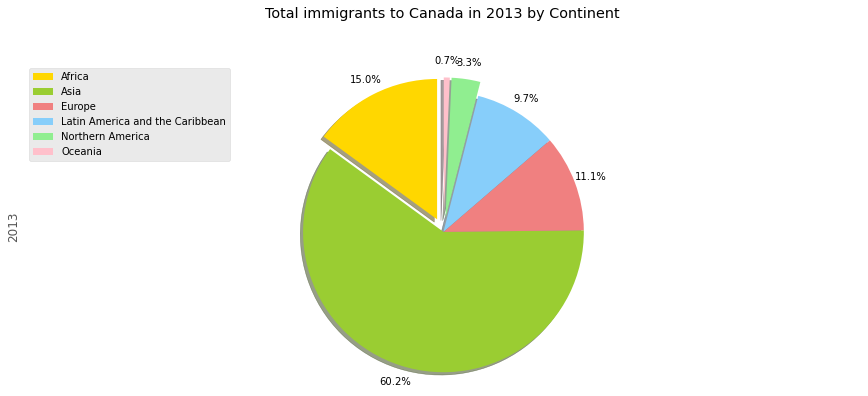

In [74]:
df_continent[2013].plot(
    kind="pie",
    figsize=(15,6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'],
    explode=[0.1,0,0,0,0.1,0.1],
    pctdistance=1.12,
    labels=None
)

plt.title("Total immigrants to Canada in 2013 by Continent", y=1.12)

# memastikan size graph nya sesuai figsize
plt.axis('equal')

# tambahin legent menggunakan script
plt.legend(labels=df_continent.index, loc="upper left")

plt.show()

## Box Plot
memberikan 5 angka statistik secara visual
- minimum
- first quartile: posisi ke 25% dari semua data
- median (second quartile): posisi ke 50%
- third quartile: posisi ke 75%
- maximum

In [76]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


Text(0, 0.5, 'Total Immigrants')

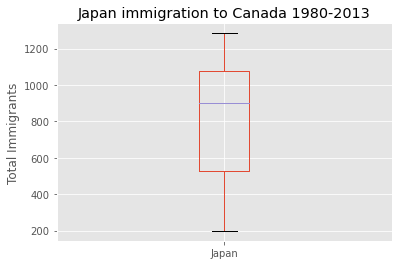

In [82]:
# plot boxplot untuk data imigrasi Jepang ke Canada 1980-2013

df_japan = df_can.loc['Japan', years]
df_japan.plot(kind="box")

# tambahin anotasi
plt.title("Japan immigration to Canada 1980-2013")
# plot boxplot untuk data imigrasi Jepang ke Canada 1980-2013# plot boxplot untuk data imigrasi Jepang ke Canada 1980-2013plt.ylabel("Total Immigrants")

Text(0, 0.5, 'Total Immigrants')

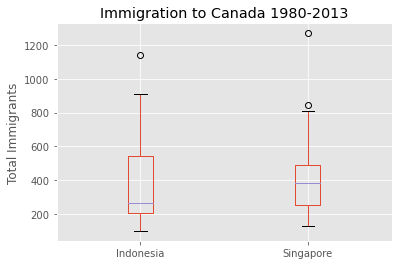

In [84]:
# plot boxplot untuk data imigrasi Indonesia, Singapura ke Canada 1980-2013

df_is = df_can.loc[['Indonesia', 'Singapore'], years].T
df_is.plot(kind="box")

# tambahin anotasi
plt.title("Immigration to Canada 1980-2013")
plt.ylabel("Total Immigrants")

Text(0, 0.5, 'Total Immigrants')

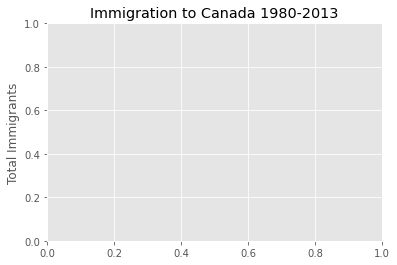

In [92]:
# dibuat menarik dengan bentuk horizontal dan warna berbeda
# plot boxplot untuk data imigrasi Indonesia, Singapura ke Canada 1980-2013

df_is = df_can.loc[['Indonesia', 'Singapore'], years].T
df_is.plot(kind="box", color='blue', vert=False)

# tambahin anotasi
plt.title("Immigration to Canada 1980-2013")
plt.ylabel("Total Immigrants")

In [88]:
df_can.loc[['Indonesia'], years].T.describe()

Country,Indonesia
count,34.000000
mean,386.764706
std,251.233449
min,100.000000
25%,207.000000
50%,266.000000
75%,545.250000
max,1138.000000


## Membuat figure
Memasukkan beberapa plot ke dalam satu gambar (figure) yang sama

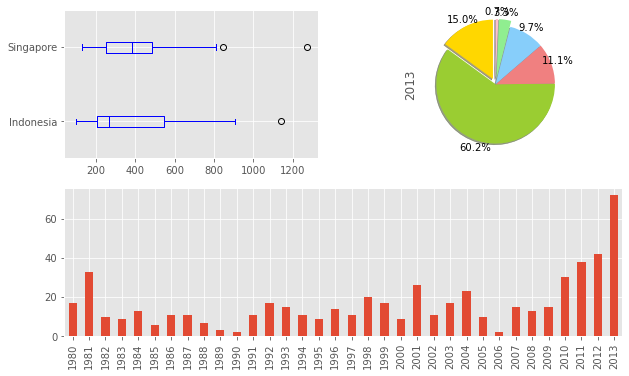

In [96]:
fig = plt.figure()

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,1,2)

df_is.plot(kind="box", color='blue', vert=False, ax=ax0)
df_continent[2013].plot(
    kind="pie",
    figsize=(15,6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink'],
    explode=[0.1,0,0,0,0.1,0.1],
    pctdistance=1.12,
    labels=None,
    ax=ax1
)
df_iceland.plot(kind="bar", figsize=(10,6), ax=ax2)

plt.show()

## Scatter Plot

In [105]:
df_can['Total'] # ini total imigrari per negara

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

In [107]:
df_can[years] # kita mau cari total imigrasi per tahun untuk seluruh negara

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [118]:
df_tot = pd.DataFrame(df_can[years].sum())
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [121]:
# kita ubah kolom index kita menjadi kolom biasa
df_tot.reset_index(inplace=True)

In [122]:
df_tot.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [123]:
df_tot.columns=['year', 'total']

In [124]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


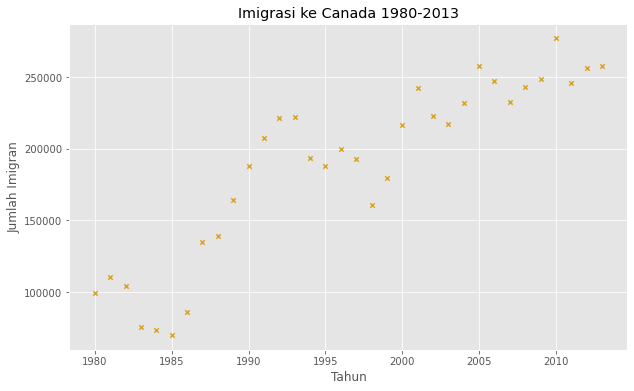

In [129]:
df_tot.plot(kind="scatter", x="year", y="total", color="goldenrod", marker="x", figsize=(10,6))

plt.title("Imigrasi ke Canada 1980-2013")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Imigran")
plt.show()